# HR Analytics

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/hr_1920x480_s5WuoZs-thumbnail-1200x1200-90.jpg'>

Practice Problem: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

## HR Analytics

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

## Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion *(only for manager position and below)* and prepare them in time. Currently the process, they are following is:

* They first identify a set of employees based on recommendations/ past performance
* Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
* At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

<img src = 'https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/wns_hack_im_1.jpg'>

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Evaluation Metric

The evaluation metric for this competition is F1 Score.

## Public and Private Split

Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

## Entorno

In [1]:
import sys
sys.version

'3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]'

In [2]:
!conda info --envs

# conda environments:
#
base                  *  C:\Users\antho\Anaconda3



## Paquetes

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
import random
import warnings
import pickle

warnings.filterwarnings('ignore')


seed = 2020
random.seed(seed)

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

DATA = Path('../../data') 
RAW  = DATA/'raw'
PROCESSED = DATA/'processed'
SUBMISSIONS = DATA/'submissions'    

MODEL = Path('../../model') 

In [4]:
pd.__version__

'1.1.3'

In [5]:
np.__version__

'1.19.2'

In [6]:
sklearn.__version__

'0.23.2'

## Lectura de datos

In [7]:
os.listdir(f'{PROCESSED}')

['.DS_Store',
 'preprocess_v1_capping_values.pkl',
 'preprocess_v1_impute_values.pkl',
 'preprocess_v1_ohe.pkl',
 'preprocess_v1_ohe_columns.pkl',
 'preprocess_v1_over50_train.csv',
 'preprocess_v1_scaler.pkl',
 'preprocess_v1_smote50_train.csv',
 'preprocess_v1_smoteTomek50_train.csv',
 'preprocess_v1_train.csv',
 'preprocess_v1_under50_train.csv',
 'preprocess_v1_val.csv',
 'preprocess_v2_capping_values.pkl',
 'preprocess_v2_knnimputation.pkl',
 'preprocess_v2_ohe.pkl',
 'preprocess_v2_ohe_columns.pkl',
 'preprocess_v2_over50_train.csv',
 'preprocess_v2_scaler.pkl',
 'preprocess_v2_scalerimputation.pkl',
 'preprocess_v2_smote50_train.csv',
 'preprocess_v2_smoteTomek50_train.csv',
 'preprocess_v2_train.csv',
 'preprocess_v2_under50_train.csv',
 'preprocess_v2_val.csv']

In [8]:
preproc_label = 'preprocess_v1'
model_label = 'logi_roc_auc'

In [9]:
df_train = pd.read_csv(f'{PROCESSED}/{preproc_label}_train.csv', compression= 'zip')
df_val = pd.read_csv(f'{PROCESSED}/{preproc_label}_val.csv', compression= 'zip')

In [10]:
df_train.shape, df_val.shape

((43846, 61), (10962, 61))

In [11]:
id_columns = 'employee_id'
target = 'is_promoted'

## Features y target

In [12]:
df_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,na_previous_year_rating,na_education,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,-0.431999,0.544625,1.375360,-0.448068,1.356651,-0.153163,-0.328225,-0.284445,-0.212536,-0.32894,-0.220673,-0.21574,-0.137364,1.961378,-0.387219,-0.135368,-0.666307,-0.387881,-0.106419,-0.110615,-0.155332,-0.094979,-0.222429,-0.125042,4.300672,-0.166592,-0.122189,-0.024823,-0.126818,-0.537077,-0.125886,-0.085878,-0.363769,-0.148817,-0.096073,-0.123338,-0.205222,-0.177348,-0.157475,-0.137364,-0.080456,-0.10934,-0.193472,-0.130933,-0.071013,-0.071175,-0.180403,-0.12103,-0.111771,-0.31312,-0.112084,-0.089315,0.634349,-0.120154,-0.612337,-0.651463,0.651463,-1.120159,-0.145991,1.168798,0
1,-0.431999,1.587188,-0.273747,-0.693649,-0.737109,-0.153163,0.270731,-0.284445,-0.212536,-0.32894,-0.220673,-0.21574,-0.137364,-0.509846,2.582520,-0.135368,-0.666307,-0.387881,-0.106419,-0.110615,-0.155332,-0.094979,-0.222429,-0.125042,-0.232522,-0.166592,8.184027,-0.024823,-0.126818,-0.537077,-0.125886,-0.085878,-0.363769,-0.148817,-0.096073,-0.123338,-0.205222,-0.177348,-0.157475,-0.137364,-0.080456,-0.10934,-0.193472,-0.130933,-0.071013,-0.071175,-0.180403,-0.12103,-0.111771,-0.31312,-0.112084,-0.089315,-1.576419,-0.120154,1.633087,1.535007,-1.535007,-1.120159,-0.145991,1.168798,0
2,-0.431999,3.020713,-0.273747,3.481229,-0.737109,-0.153163,0.570210,-0.284445,-0.212536,-0.32894,-0.220673,-0.21574,-0.137364,-0.509846,2.582520,-0.135368,-0.666307,-0.387881,-0.106419,-0.110615,-0.155332,-0.094979,-0.222429,-0.125042,-0.232522,-0.166592,-0.122189,-0.024823,-0.126818,1.861932,-0.125886,-0.085878,-0.363769,-0.148817,-0.096073,-0.123338,-0.205222,-0.177348,-0.157475,-0.137364,-0.080456,-0.10934,-0.193472,-0.130933,-0.071013,-0.071175,-0.180403,-0.12103,-0.111771,-0.31312,-0.112084,-0.089315,0.634349,-0.120154,-0.612337,1.535007,-1.535007,0.892730,-0.145991,-0.855580,0
3,-0.431999,-0.888899,0.550807,-0.448068,-0.737109,-0.153163,-1.076920,-0.284445,-0.212536,-0.32894,-0.220673,-0.21574,-0.137364,-0.509846,-0.387219,-0.135368,1.500810,-0.387881,-0.106419,-0.110615,-0.155332,-0.094979,4.495819,-0.125042,-0.232522,-0.166592,-0.122189,-0.024823,-0.126818,-0.537077,-0.125886,-0.085878,-0.363769,-0.148817,-0.096073,-0.123338,-0.205222,-0.177348,-0.157475,-0.137364,-0.080456,-0.10934,-0.193472,-0.130933,-0.071013,-0.071175,-0.180403,-0.12103,-0.111771,-0.31312,-0.112084,-0.089315,0.634349,-0.120154,-0.612337,-0.651463,0.651463,0.892730,-0.145991,-0.855580,0
4,-0.431999,0.544625,-0.273747,0.779837,-0.737109,-0.153163,1.318905,-0.284445,-0.212536,-0.32894,-0.220673,-0.21574,-0.137364,-0.509846,-0.387219,-0.135368,-0.666307,2.578113,-0.106419,-0.110615,-0.155332,-0.094979,-0.222429,-0.125042,-0.232522,-0.166592,-0.122189,-0.024823,-0.126818,-0.537077,7.943698,-0.085878,-0.363769,-0.148817,-0.096073,-0.123338,-0.205222,-0.177348,-0.157475,-0.137364,-0.080456,-0.10934,-0.193472,-0.130933,-0.071013,-0.071175,-0.180403,-0.12103,-0.111771,-0.31312,-0.112084,-0.089315,-1.576419,-0.120154,1.633087,-0.651463,0

In [13]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

X_val = df_val.drop(target, axis = 1)
y_val = df_val[target]

In [14]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((43846, 60), (43846,), (10962, 60), (10962,))

## Proporción de target

In [15]:
y_train.mean()

0.08516170232176254

In [16]:
y_val.mean()

0.08520343003101624

## Entrenamiento

Métricas para Grid Search https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

grid search con roc_auc

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

In [19]:
cv_params = {'penalty': ['l1','l2'],
              'C': [0.001,0.01,0.1,1,10,100,1000],
            'random_state': [seed]}

gs = GridSearchCV(logi, cv_params, scoring = 'f1', cv = 5, n_jobs= -1)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'random_state': [2020]},
             scoring='f1')

In [20]:
pd.DataFrame(gs.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,1.534604,0.113042,0.042087,0.040680,100,l2,2020,"{'C': 100, 'penalty': 'l2', 'random_state': 2020}",0.410256,0.411067,0.382413,0.361746,0.400000,0.393097,0.018772,1
13,1.253752,0.157002,0.013763,0.003753,1000,l2,2020,"{'C': 1000, 'penalty': 'l2', 'random_state': 2...",0.410256,0.411067,0.382413,0.361746,0.400000,0.393097,0.018772,1
9,1.302628,0.154165,0.043683,0.041118,10,l2,2020,"{'C': 10, 'penalty': 'l2', 'random_state': 2020}",0.408687,0.411474,0.382413,0.362123,0.400000,0.392939,0.018449,3
7,1.167478,0.021190,0.022340,0.025267,1,l2,2020,"{'C': 1, 'penalty': 'l2', 'random_state': 2020}",0.405539,0.405567,0.382805,0.360792,0.398798,0.390700,0.017109,4
5,1.267317,0.214133,0.050168,0.042805,0.1,l2,2020,"{'C': 0.1, 'penalty': 'l2', 'random_state': 2020}",0.386108,0.380855,0.366316,0.337272,0.379877,0.370086,0.017661,5
3,0.797271,0.226838,0.020146,0.019374,0.01,l2,2020,"{'C': 0.01, 'penalty': 'l2', 'random_state': 2...",0.279279,0.300668,0.260870,0.234467,0.258211,0.266699,0.022168,6
1,1.071742,0.230381,0.026728,0.034510,0.001,l2,2020,"{'C': 0.001, 'penalty': 'l2', 'random_state': ...",0.114002,0.139364,0.110000,0.084076,0.115906,0.112670,0.017604,7
0,0.107415,0.027259,0.000000,0.000000,0.001,l1,2020,"{'C': 0.001, 'penalty': 'l1', 'random_state': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,0.092751,0.026311,0.000000,0.000000,0.01,l1,2020,"{'C': 0.01, 'penalty': 'l1', 'random_state': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.108611,0.010413,0.000000,0.000000,0.1,l1,2020,"{'C': 0.1, 'penalty': 'l1', 'random_state': 2020}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [21]:
gs.best_params_

{'C': 100, 'penalty': 'l2', 'random_state': 2020}

In [22]:
gs.best_score_

0.39309661072264435

In [23]:
best_logi = gs.best_estimator_

In [24]:
best_logi

LogisticRegression(C=100, random_state=2020)

Guardar el modelo

In [25]:

model_label=model_label + preproc_label
with open(f'{MODEL}/{model_label}_model.pkl', 'wb') as file:
    pickle.dump(best_logi, file)

## Reentrenamiento con train completo y prueba en validación

In [26]:
with open(f'{MODEL}/{model_label}_model.pkl', 'rb') as file:
    best_dt = pickle.load(file)

In [27]:
best_dt.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2020,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((43846, 60), (43846,), (10962, 60), (10962,))

In [29]:
best_logi.fit(X_train, y_train)

LogisticRegression(C=100, random_state=2020)

In [30]:
with open(f'{MODEL}/{model_label}_model_full.pkl', 'wb') as file:
    pickle.dump(best_dt, file)

## Evaluación

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from matplotlib import pyplot

In [32]:
y_train_pred = best_dt.predict(X_train)
y_val_pred = best_dt.predict(X_val)

In [33]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_train_pred_proba = best_dt.predict_proba(X_train)[:,1]
y_val_pred_proba = best_dt.predict_proba(X_val)[:,1]

In [35]:
y_train_pred_proba

array([0.0850896 , 0.00816393, 0.01895275, ..., 0.02912669, 0.00230896,
       0.04790904])

In [36]:
roc_auc_score(y_train, y_train_pred_proba)

0.8731306526247129

In [37]:
roc_auc_score(y_val, y_val_pred_proba)

0.8819810953313592

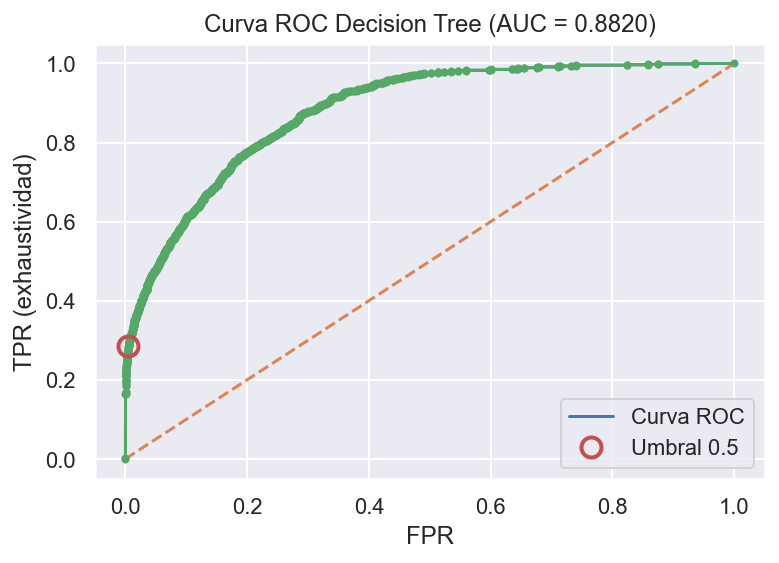

In [38]:
probs = best_dt.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_val_pred_proba)
fpr, tpr, umbrales = roc_curve(y_val, y_val_pred_proba)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC Decision Tree (AUC = %.4f)" % auc))

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
# show the plot
pyplot.show()

In [39]:
prec, recall, threshold = precision_recall_curve(y_val, probs)

prec_recall = pd.DataFrame({'prec': prec[:-1], 'recall': recall[:-1], 'threshold': threshold})
prec_recall.head()

,prec,recall,threshold
0,0.090548,1.000000,0.003950
1,0.090460,0.998929,0.003950
2,0.090468,0.998929,0.003952
3,0.090477,0.998929,0.003956
4,0.090486,0.998929,0.003956


In [40]:
prec_recall['f1'] = 2*prec_recall['prec']*prec_recall['recall'] / (prec_recall['prec'] + prec_recall['recall'])

In [41]:
prec_recall.sort_values(by = 'f1', ascending = False)

,prec,recall,threshold,f1
9456,0.505251,0.463597,0.260590,0.483529
9447,0.502309,0.465739,0.258797,0.483333
9455,0.504662,0.463597,0.260175,0.483259
9459,0.505855,0.462527,0.260827,0.483221
9446,0.501730,0.465739,0.257233,0.483065
...,...,...,...,...
10308,1.000000,0.005353,0.999998,0.010650
10309,1.000000,0.004283,0.999998,0.008529
10310,1.000000,0.003212,0.999999,0.006403
10311,1.000000,0.002141,0.999999,0.004274


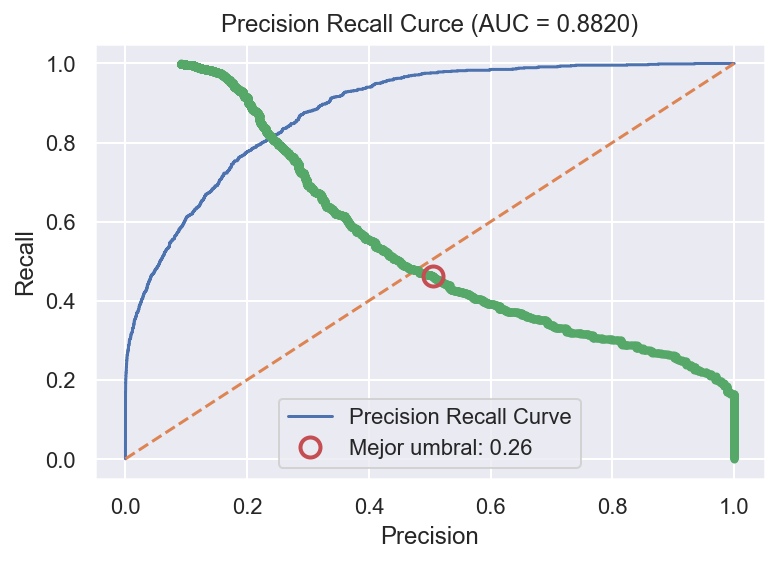

In [42]:
y_val_pred = best_dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

precision, recall, umbrales = precision_recall_curve(y_val, probs)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Precision Recall Curve") )
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title(("Precision Recall Curce (AUC = %.4f)" % auc))

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(prec, recall, marker='.')

f1 = 2*precision*recall / (precision + recall)
best_f1_index = f1.argmax()
best_umbral = umbrales[best_f1_index]

plt.plot(precision[best_f1_index], recall[best_f1_index], 'o', markersize=10,
         label=f"Mejor umbral: {best_umbral:.2f}", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)
pyplot.show()

In [43]:
labels = np.where(y_val_pred > 0.268443, 1, 0)

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_val, labels)

0.4811858608893957

In [46]:
y_train_pred_label = best_dt.predict(X_train)
y_val_pred_label = best_dt.predict(X_val)

In [47]:
print(classification_report(y_train, y_train_pred_label))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     40112
           1       0.80      0.26      0.40      3734

    accuracy                           0.93     43846
   macro avg       0.87      0.63      0.68     43846
weighted avg       0.92      0.93      0.92     43846



In [48]:
print(classification_report(y_val, y_val_pred_label))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.84      0.28      0.42       934

    accuracy                           0.93     10962
   macro avg       0.89      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962

